<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png"/>

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>    

# Analisis de características de los textos. 

Se van a analizar los datos de los textos de la bbc. Todas las noticias estan en ingles




# Cargando librerias

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import pad_sequences 
import tensorflow as tf 
from matplotlib import pyplot as plt
import seaborn as sns

# asegurar que los experimentos se pueden reproducir
tf.random.set_seed(42)

tf.__version__

'2.12.0'

# Cargando Datos

In [2]:
from google.colab import drive
# mount your google drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/NLP/Proyecto/"

Mounted at /content/drive


# Limpiando datos

Usar este fragmento para generar el fichero data_train.csv

In [5]:
#df_train = pd.read_excel(PATH+"train_data.xlsx") 
#print('dataset cargado:', df_train.shape)
#df_train.head()

#df_train.info()
#df_train.isnull().sum()
#df2 = df_train.dropna()
#df2.isnull().sum()
#df_train = df2
#total_data = df2
#df_train.to_csv(PATH + 'data_train.csv', index=False, encoding='utf-8-sig')

Como ya tengo generado el fichero solo lo cargare

In [18]:
df_train = pd.read_csv(PATH+"data_train.csv")
total_data = df_train.copy()

# Antes de dividir los textos comprobando que se mantienen los mismos %

In [ ]:
def print_count_percent(df, column_name):
  counts_train=(df[column_name]).value_counts().to_dict()
  print(counts_train)

  total = len(df)
  print(total)

  percent_train = {}
  for i in counts_train:
    percent_train[i] = round(counts_train[i]/total * 100,2)
    
  print(percent_train)

print_count_percent(df_train, 'Polarity')

{5: 157093, 4: 60225, 3: 21654, 2: 6952, 1: 5772}
251696
{5: 62.41, 4: 23.93, 3: 8.6, 2: 2.76, 1: 2.29}


In [ ]:
part = df_train[:15103]
print_count_percent(part, 'Polarity')

{5: 9318, 4: 3673, 3: 1344, 2: 440, 1: 328}
15103
{5: 61.7, 4: 24.32, 3: 8.9, 2: 2.91, 1: 2.17}


In [ ]:
print_count_percent(df_train, 'Country')
print_count_percent(part, 'Country')

{'Mexico': 118771, 'Colombia': 66703, 'Cuba': 66222}
251696
{'Mexico': 47.19, 'Colombia': 26.5, 'Cuba': 26.31}
{'Mexico': 6086, 'Colombia': 4577, 'Cuba': 4440}
15103
{'Mexico': 40.3, 'Colombia': 30.31, 'Cuba': 29.4}


In [ ]:
print_count_percent(df_train, 'Type')
print_count_percent(part, 'Type')

{'Attractive': 111185, 'Hotel': 76039, 'Restaurant': 64472}
251696
{'Attractive': 44.17, 'Hotel': 30.21, 'Restaurant': 25.62}
{'Attractive': 7208, 'Hotel': 4073, 'Restaurant': 3822}
15103
{'Attractive': 47.73, 'Hotel': 26.97, 'Restaurant': 25.31}


# Dividiendo datos

In [19]:
from sklearn.model_selection import train_test_split

y = df_train['Polarity']
X = df_train.drop(['Polarity'], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


# cuando suban los datos del test, comentar esta linea
#X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=5, stratify=y_val)

df_val = pd.concat([X_val, y_val], axis=1)
#df_test = pd.concat([X_test, y_test], axis=1)
df_train = pd.concat([X_train, y_train], axis=1)

print('Tamaño conjunto de entrenamiento:', len(X_train))
print('Tamaño conjunto de validación:', len(X_val))
#print('Tamaño conjunto de test:', len(X_test))

Tamaño conjunto de entrenamiento: 201356
Tamaño conjunto de validación: 50340


# Contando la cantidad de elementos por clase Polarity

Contemos ahora la cantidad de textos por categoria para hacer un grafico de barras

In [8]:
counts_train=(df_train['Polarity']).value_counts().to_dict()
counts_val=(df_val['Polarity']).value_counts().to_dict()
#counts_test=(df_test['Polarity']).value_counts().to_dict()
print("Distribución de clases en (entrenamiento):", counts_train)
print("Distribución de clases en (validacion):", counts_val)
#print("Distribución de clases en (test):", counts_test)

Distribución de clases en (entrenamiento): {5: 125674, 4: 48180, 3: 17323, 2: 5561, 1: 4618}
Distribución de clases en (validacion): {5: 31419, 4: 12045, 3: 4331, 2: 1391, 1: 1154}


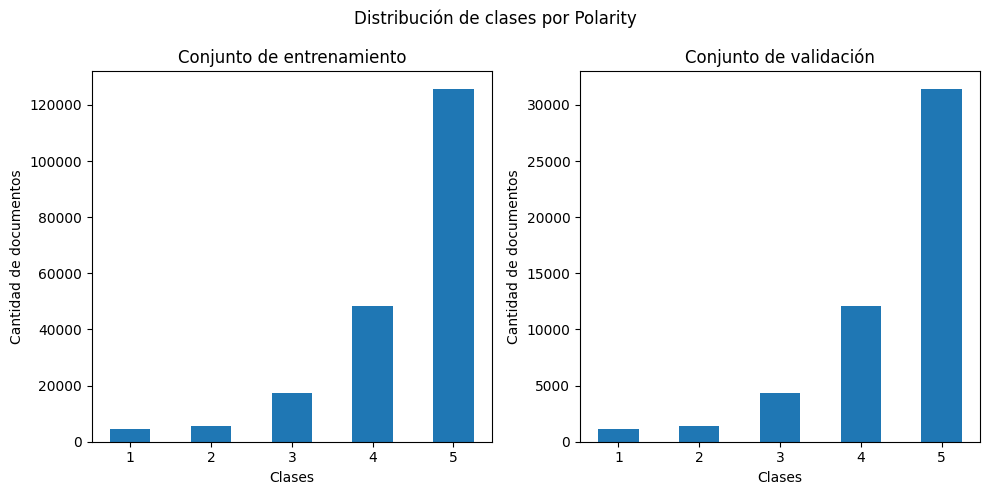

In [9]:
#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(10, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribución de clases por Polarity' )
ax_train.bar(counts_train.keys(), counts_train.values(), width=0.5)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Cantidad de documentos')

#for index,data in enumerate(counts_train.values()):
#    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=10))

ax_val.bar(counts_val.keys(), counts_val.values(), width=0.5)
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Cantidad de documentos')

#ax_test.bar(counts_val.keys(), counts_val.values(), width=0.5)
#ax_test.set_title('Conjunto de prueba')
#ax_test.set_xlabel('Clases')
#ax_test.set_ylabel('Cantidad de documentos')


plt.tight_layout()
plt.show()

#plt.set_xticklabels(counts_train.keys(), rotation=90)

    

En los 3 grupos se mantiene la misma distribución en cuanto a la clases por Polaridad.

# Contando la cantidad de elementos por clase Country

Distribución de clases en (entrenamiento): {'Mexico': 95026, 'Colombia': 53235, 'Cuba': 53095}
Distribución de clases en (validacion): {'Mexico': 23745, 'Colombia': 13468, 'Cuba': 13127}


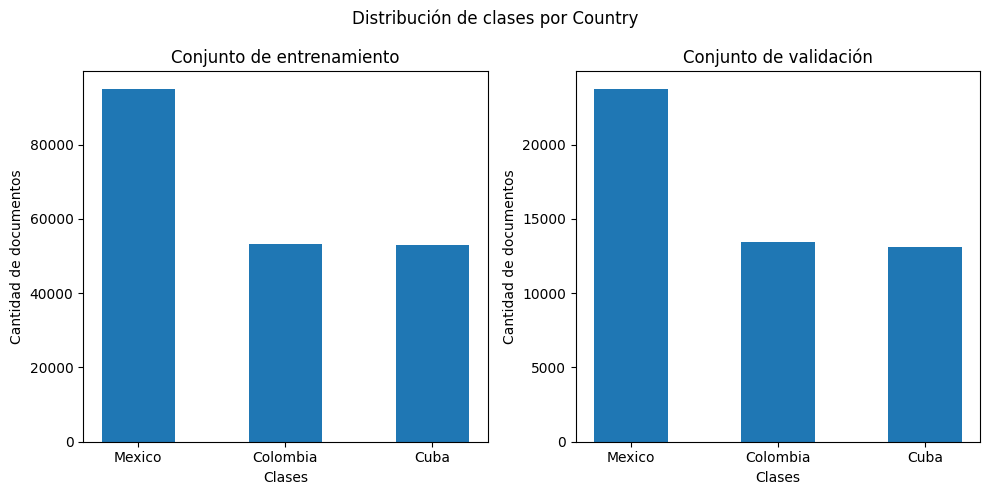

In [24]:
counts_train=(df_train['Country']).value_counts().to_dict()
counts_val=(df_val['Country']).value_counts().to_dict()
print("Distribución de clases en (entrenamiento):", counts_train)
print("Distribución de clases en (validacion):", counts_val)

#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(10, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribución de clases por Country' )
ax_train.bar(counts_train.keys(), counts_train.values(), width=0.5)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Cantidad de documentos')

ax_val.bar(counts_val.keys(), counts_val.values(), width=0.5)
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Cantidad de documentos')

plt.tight_layout()
plt.show()

# Contando la cantidad de elementos por clase Type

Distribución de clases en (entrenamiento): {'Attractive': 88945, 'Hotel': 60858, 'Restaurant': 51553}
Distribución de clases en (validacion): {'Attractive': 22240, 'Hotel': 15181, 'Restaurant': 12919}


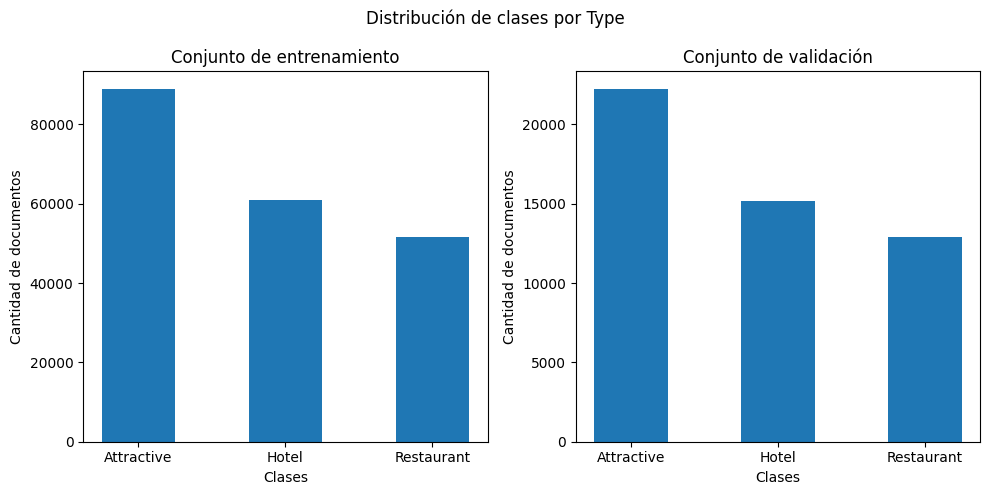

In [25]:
counts_train=(df_train['Type']).value_counts().to_dict()
counts_val=(df_val['Type']).value_counts().to_dict()
print("Distribución de clases en (entrenamiento):", counts_train)
print("Distribución de clases en (validacion):", counts_val)

#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(10, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribución de clases por Type' )
ax_train.bar(counts_train.keys(), counts_train.values(), width=0.5)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Cantidad de documentos')

ax_val.bar(counts_val.keys(), counts_val.values(), width=0.5)
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Cantidad de documentos')

plt.tight_layout()
plt.show()

# Distribucion del tamanno de los textos

Ahora analizamos los tamaños de los textos en cuanto a diferentes percentiles

In [10]:
length_train=df_train['Review'].apply(lambda text: len(text.split()))
print(length_train.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

count    201356.000000
mean         62.343809
std          75.286143
min           1.000000
25%          30.000000
50%          44.000000
75%          69.000000
90%         128.000000
95%         146.000000
99%         338.000000
max        3511.000000
Name: Review, dtype: float64


El texto máximo es de 3507 caracteres, menos del 50% de los datos tienen un tamaño de 44 caracteres, menos del 75 tienen tienen un tamaño de 69 y un 0.01 % tienen mas de 335 caracteres.

In [11]:
length_val=df_val['Review'].apply(lambda text: len(text.split()))
print(length_val.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

count    50340.000000
mean        62.057886
std         71.538599
min          3.000000
25%         30.000000
50%         44.000000
75%         69.000000
90%        128.000000
95%        145.000000
99%        319.000000
max       2593.000000
Name: Review, dtype: float64


El texto máximo es de 3511 caracteres, menos del 50% de los datos tienen un tamaño de 44

In [12]:
#length_test=df_test['Review'].apply(lambda text: len(text.split()))
#print(length_test.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

Text(0, 0.5, 'Número de textos')

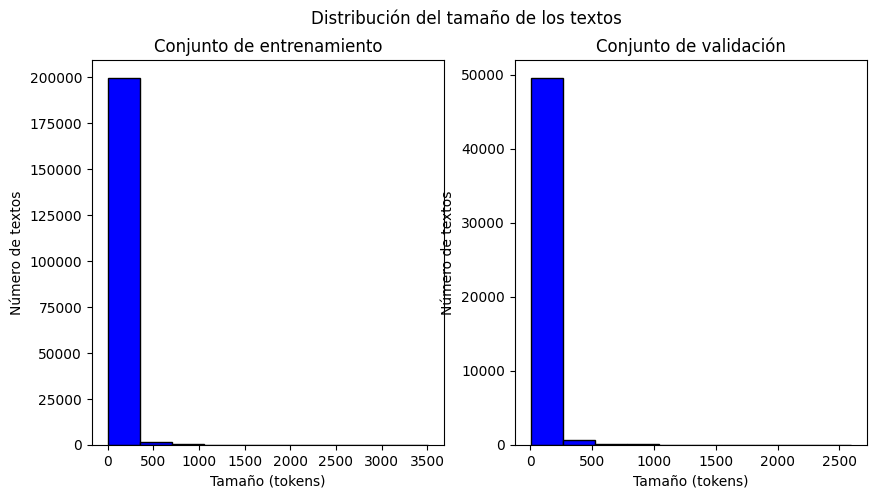

In [13]:
#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(10, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(length_train,  color = 'blue', edgecolor = 'black',
         bins = int(100/10))
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Tamaño (tokens)')
ax_train.set_ylabel('Número de textos')

ax_val.hist(length_val,  color = 'blue', edgecolor = 'black',
         bins = int(100/10))
ax_val.set_title('Conjunto de validación')
ax_val.set_xlabel('Tamaño (tokens)')
ax_val.set_ylabel('Número de textos')

#ax_test.hist(length_val,  color = 'blue', edgecolor = 'black',
#         bins = int(100/10))
#ax_test.set_title('Conjunto de test')
#ax_test.set_xlabel('Tamaño (tokens)')
#ax_test.set_ylabel('Número de textos')


Como se aprecia en el grafico la mayoria de palabras tienen menos de 1000 caracteres

# Densidad de las clases por paises

Text(0, 0.5, 'Densidad')

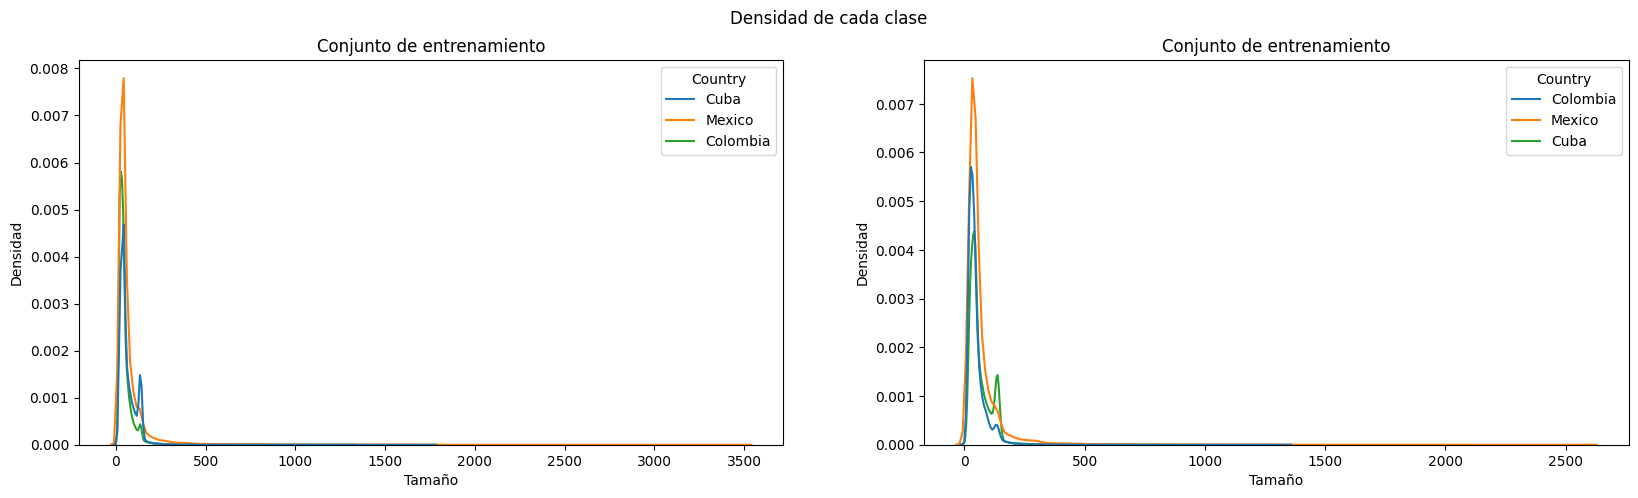

In [14]:
#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Densidad de cada clase')

df_train['length'] = df_train['Review'].apply(lambda text: len(text.split()))
df_val['length'] = df_val['Review'].apply(lambda text: len(text.split()))
#df_test['length'] = df_test['Review'].apply(lambda text: len(text.split()))

sns.kdeplot(data=df_train, x='length', hue='Country', ax = ax_train)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

sns.kdeplot(data=df_val, x='length', hue='Country', ax = ax_val)
ax_val.set_title('Conjunto de entrenamiento')
ax_val.set_xlabel('Tamaño')
ax_val.set_ylabel('Densidad')

#sns.kdeplot(data=df_test, x='length', hue='Country', ax = ax_test)
#ax_test.set_title('Conjunto de test')
#ax_test.set_xlabel('Tamaño')
#ax_test.set_ylabel('Densidad')

Aqui se ve la distribucion de los textos tamannos de los textos para cada clase .

En ambos conjunto los mas densos son los de la clase bussines y el menos denso en tech

# Graficos de barra de polaridad por paises

['Cuba' 'Mexico' 'Colombia']


<ipython-input-15-c3694f9d715d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Country == c][df.Polarity == 1].count()[0])
<ipython-input-15-c3694f9d715d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Country == c][df.Polarity == 2].count()[0])
<ipython-input-15-c3694f9d715d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Country == c][df.Polarity == 3].count()[0])
<ipython-input-15-c3694f9d715d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Country == c][df.Polarity == 4].count()[0])
<ipython-input-15-c3694f9d715d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Country == c][df.Polarity == 5].count()[0])
<ipython-input-15-c3694f9d715d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(

['Colombia' 'Mexico' 'Cuba']


<ipython-input-15-c3694f9d715d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Country == c][df.Polarity == 3].count()[0])
<ipython-input-15-c3694f9d715d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Country == c][df.Polarity == 4].count()[0])
<ipython-input-15-c3694f9d715d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Country == c][df.Polarity == 5].count()[0])
<ipython-input-15-c3694f9d715d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Country == c][df.Polarity == 1].count()[0])
<ipython-input-15-c3694f9d715d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Country == c][df.Polarity == 2].count()[0])
<ipython-input-15-c3694f9d715d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(

Text(0.5, 1.0, 'Conjunto de validación')

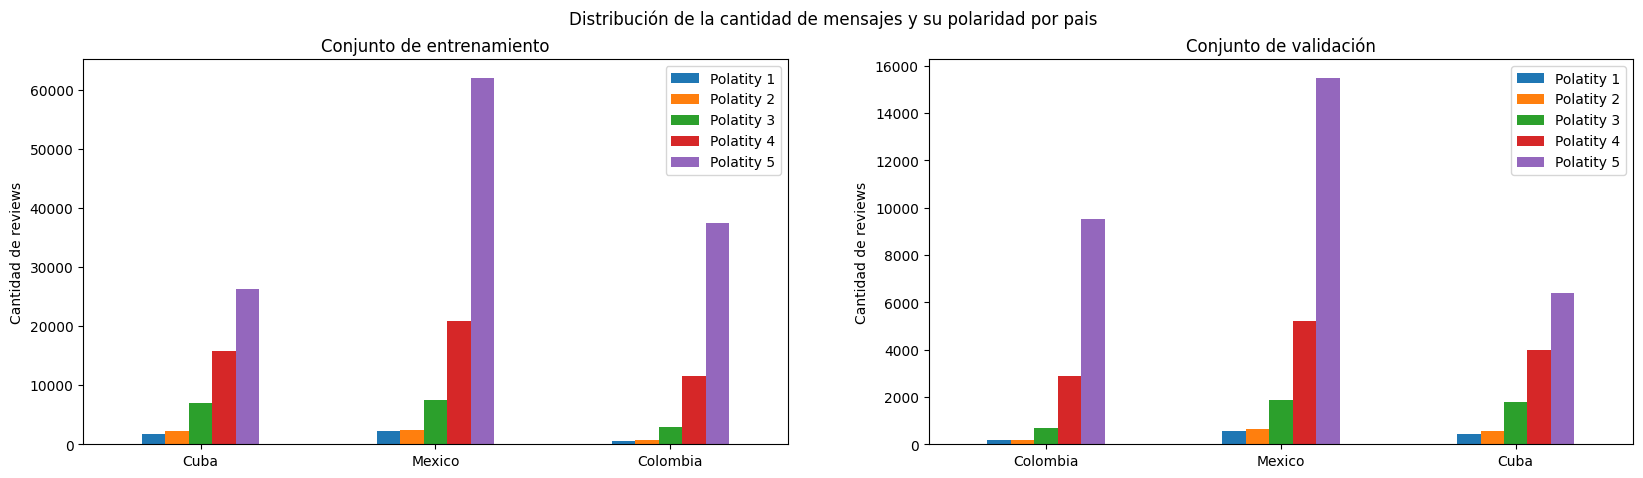

In [15]:
def SeparteByCountry(df, ax):
  country = df['Country'].unique()
  print(country)
  c_1 = []
  c_2 = []
  c_3 = []
  c_4 = []
  c_5 = []
  for c in country:
    c_1.append(df[df.Country == c][df.Polarity == 1].count()[0])
    c_2.append(df[df.Country == c][df.Polarity == 2].count()[0])
    c_3.append(df[df.Country == c][df.Polarity == 3].count()[0])
    c_4.append(df[df.Country == c][df.Polarity == 4].count()[0])
    c_5.append(df[df.Country == c][df.Polarity == 5].count()[0])
  
  df = pd.DataFrame({'Polatity 1': c_1, 'Polatity 2': c_2, 'Polatity 3': c_3, 'Polatity 4': c_4, 'Polatity 5': c_5,}, index=country)
  df.plot.bar(ax = ax)
  ax.set_ylabel("Cantidad de reviews")
  ax.set_xticklabels(country, rotation = 0)


#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Distribución de la cantidad de mensajes y su polaridad por pais')

SeparteByCountry(df_train, ax_train)
ax_train.set_title('Conjunto de entrenamiento')

SeparteByCountry(df_val, ax_val)
ax_val.set_title('Conjunto de validación')

#SeparteByCountry(df_test, ax_test)
#ax_test.set_title('Conjunto de test')


# Densidad de textos por lugar

Text(0, 0.5, 'Densidad')

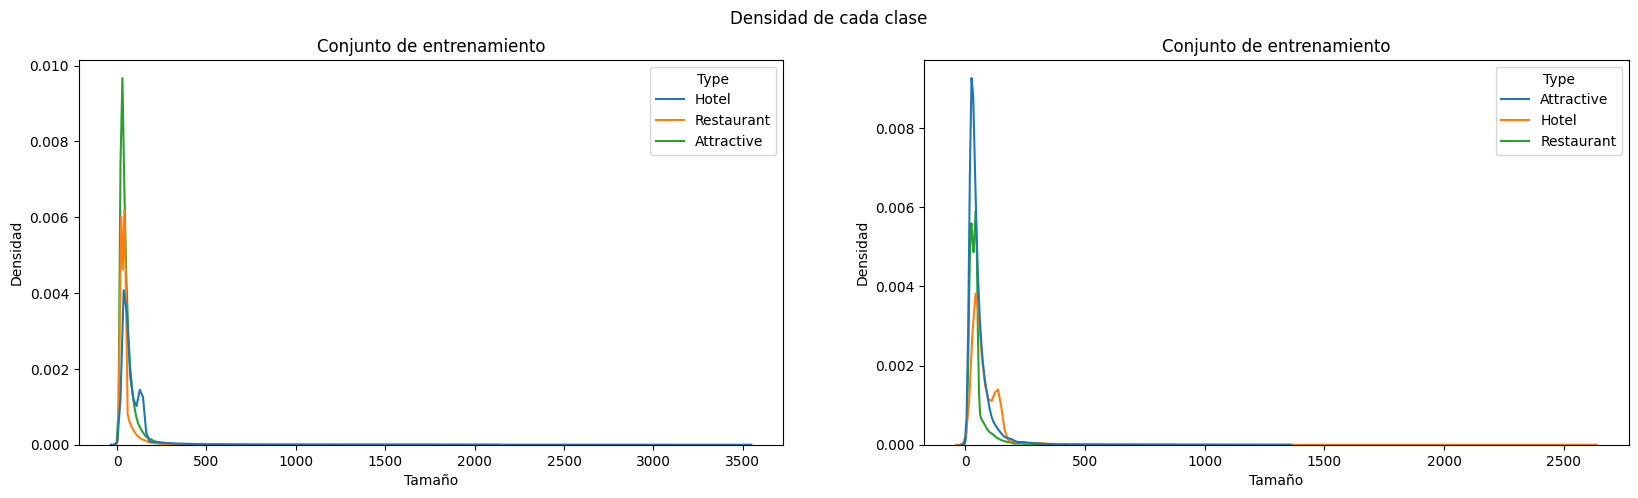

In [16]:
#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Densidad de cada clase')

df_train['length'] = df_train['Review'].apply(lambda text: len(text.split()))
df_val['length'] = df_val['Review'].apply(lambda text: len(text.split()))
#df_test['length'] = df_test['Review'].apply(lambda text: len(text.split()))

sns.kdeplot(data=df_train, x='length', hue='Type', ax = ax_train)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

sns.kdeplot(data=df_val, x='length', hue='Type', ax = ax_val)
ax_val.set_title('Conjunto de entrenamiento')
ax_val.set_xlabel('Tamaño')
ax_val.set_ylabel('Densidad')

#sns.kdeplot(data=df_test, x='length', hue='Country', ax = ax_test)
#ax_test.set_title('Conjunto de test')
#ax_test.set_xlabel('Tamaño')
#ax_test.set_ylabel('Densidad')

# Graficos de barra de polaridad por lugar

['Hotel' 'Restaurant' 'Attractive']


<ipython-input-17-6c2e6e5b7f8d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Type == c][df.Polarity == 1].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Type == c][df.Polarity == 2].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Type == c][df.Polarity == 3].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Type == c][df.Polarity == 4].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Type == c][df.Polarity == 5].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Type == c

['Attractive' 'Hotel' 'Restaurant']


<ipython-input-17-6c2e6e5b7f8d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Type == c][df.Polarity == 3].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Type == c][df.Polarity == 4].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Type == c][df.Polarity == 5].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Type == c][df.Polarity == 1].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Type == c][df.Polarity == 2].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Type == c

Text(0.5, 1.0, 'Conjunto de validación')

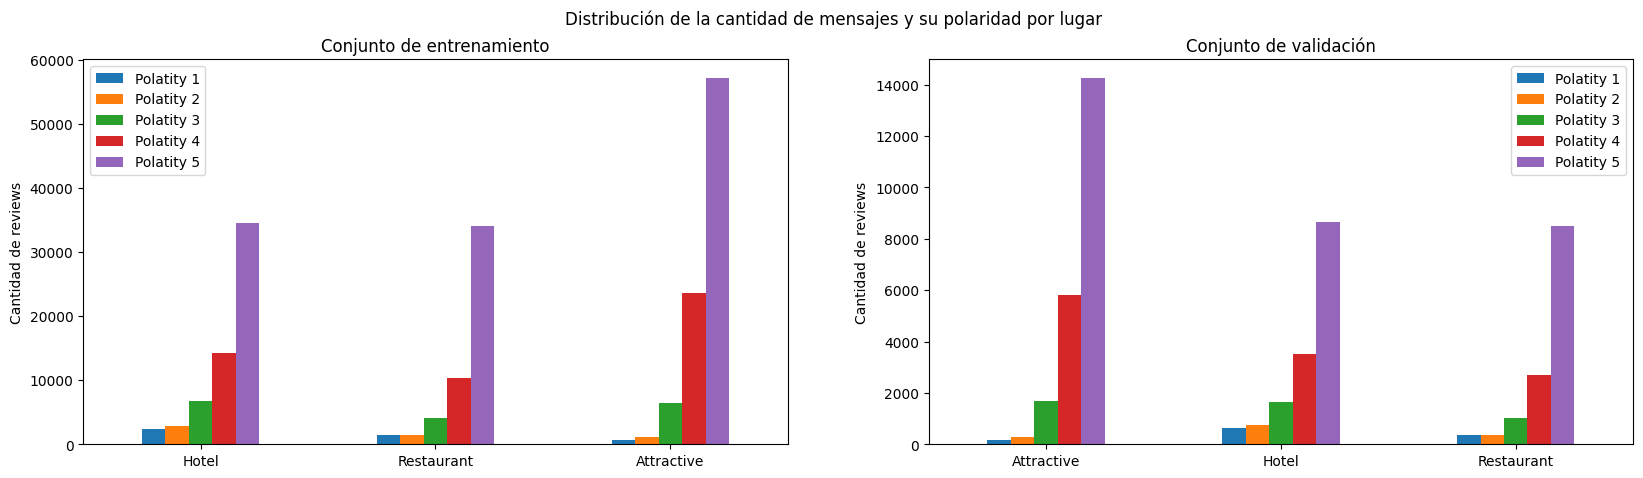

In [17]:
def SeparteByPlace(df, ax):
  type_n = df['Type'].unique()
  print(type_n)
  c_1 = []
  c_2 = []
  c_3 = []
  c_4 = []
  c_5 = []
  for c in type_n:
    c_1.append(df[df.Type == c][df.Polarity == 1].count()[0])
    c_2.append(df[df.Type == c][df.Polarity == 2].count()[0])
    c_3.append(df[df.Type == c][df.Polarity == 3].count()[0])
    c_4.append(df[df.Type == c][df.Polarity == 4].count()[0])
    c_5.append(df[df.Type == c][df.Polarity == 5].count()[0])
  
  df = pd.DataFrame({'Polatity 1': c_1, 'Polatity 2': c_2, 'Polatity 3': c_3, 'Polatity 4': c_4, 'Polatity 5': c_5,}, index=type_n)
  df.plot.bar(ax = ax)
  ax.set_ylabel("Cantidad de reviews")
  ax.set_xticklabels(type_n, rotation = 0)


#fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 5))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Distribución de la cantidad de mensajes y su polaridad por lugar')

SeparteByPlace(df_train, ax_train)
ax_train.set_title('Conjunto de entrenamiento')

SeparteByPlace(df_val, ax_val)
ax_val.set_title('Conjunto de validación')

#SeparteByPlace(df_test, ax_test)
#ax_test.set_title('Conjunto de test')

# Todos los datos juntos

Distribución de Polarity: {5: 157093, 4: 60225, 3: 21654, 2: 6952, 1: 5772}
Distribución de Country: {'Mexico': 118771, 'Colombia': 66703, 'Cuba': 66222}
Distribución de Type: {'Attractive': 111185, 'Hotel': 76039, 'Restaurant': 64472}


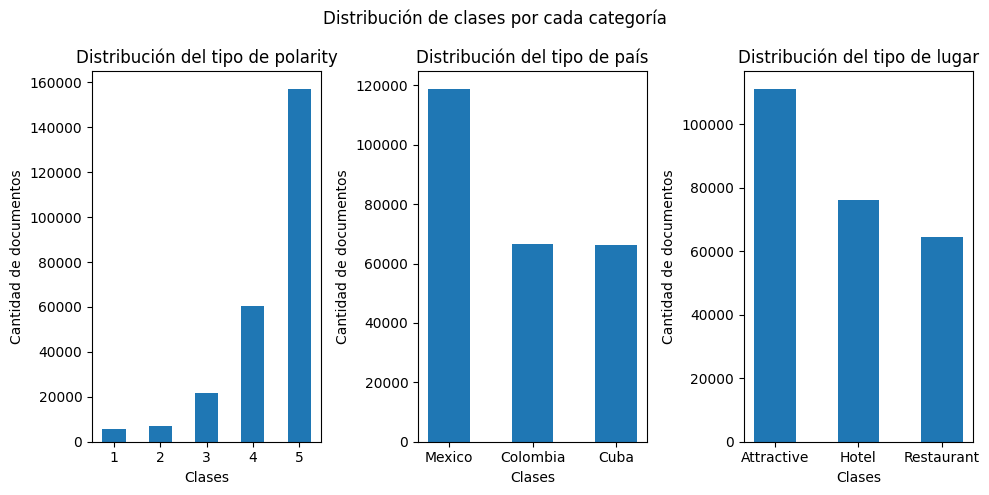

In [27]:
counts_p=(total_data['Polarity']).value_counts().to_dict()
counts_c=(total_data['Country']).value_counts().to_dict()
counts_t=(total_data['Type']).value_counts().to_dict()
#counts_test=(df_test['Polarity']).value_counts().to_dict()
print("Distribución de Polarity:", counts_p)
print("Distribución de Country:", counts_c)
print("Distribución de Type:", counts_t)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Distribución de clases por cada categoría' )
ax1.bar(counts_p.keys(), counts_p.values(), width=0.5)
ax1.set_title('Distribución del tipo de polarity')
ax1.set_xlabel('Clases')
ax1.set_ylabel('Cantidad de documentos')

ax2.bar(counts_c.keys(), counts_c.values(), width=0.5)
ax2.set_title('Distribución del tipo de país')
ax2.set_xlabel('Clases')
ax2.set_ylabel('Cantidad de documentos')

ax3.bar(counts_t.keys(), counts_t.values(), width=0.5)
ax3.set_title('Distribución del tipo de lugar')
ax3.set_xlabel('Clases')
ax3.set_ylabel('Cantidad de documentos')


plt.tight_layout()
plt.show()

#plt.set_xticklabels(counts_train.keys(), rotation=90)

['Colombia' 'Cuba' 'Mexico']


<ipython-input-15-c3694f9d715d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Country == c][df.Polarity == 1].count()[0])
<ipython-input-15-c3694f9d715d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Country == c][df.Polarity == 2].count()[0])
<ipython-input-15-c3694f9d715d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Country == c][df.Polarity == 3].count()[0])
<ipython-input-15-c3694f9d715d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Country == c][df.Polarity == 4].count()[0])
<ipython-input-15-c3694f9d715d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Country == c][df.Polarity == 5].count()[0])
<ipython-input-15-c3694f9d715d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(

['Hotel' 'Restaurant' 'Attractive']


<ipython-input-17-6c2e6e5b7f8d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Type == c][df.Polarity == 2].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_3.append(df[df.Type == c][df.Polarity == 3].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_4.append(df[df.Type == c][df.Polarity == 4].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_5.append(df[df.Type == c][df.Polarity == 5].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_1.append(df[df.Type == c][df.Polarity == 1].count()[0])
<ipython-input-17-6c2e6e5b7f8d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_2.append(df[df.Type == c

Text(0.5, 1.0, 'Distribución de la cantidad de mensajes y su polaridad por lugar')

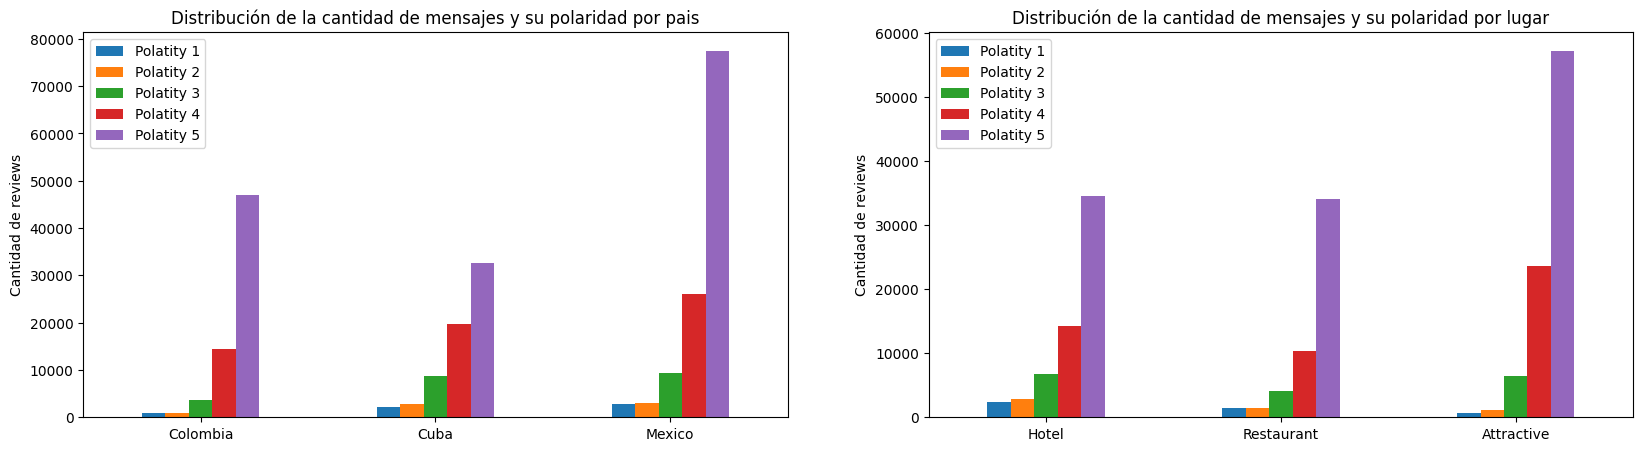

In [28]:
fig, (ax, ax_1) = plt.subplots(1, 2, figsize=(20, 5))
#fig.suptitle('Todos los datos')

SeparteByCountry(total_data, ax)
ax.set_title('Distribución de la cantidad de mensajes y su polaridad por pais')

SeparteByPlace(df_train, ax_1)
ax_1.set_title('Distribución de la cantidad de mensajes y su polaridad por lugar')

Text(0, 0.5, 'Densidad')

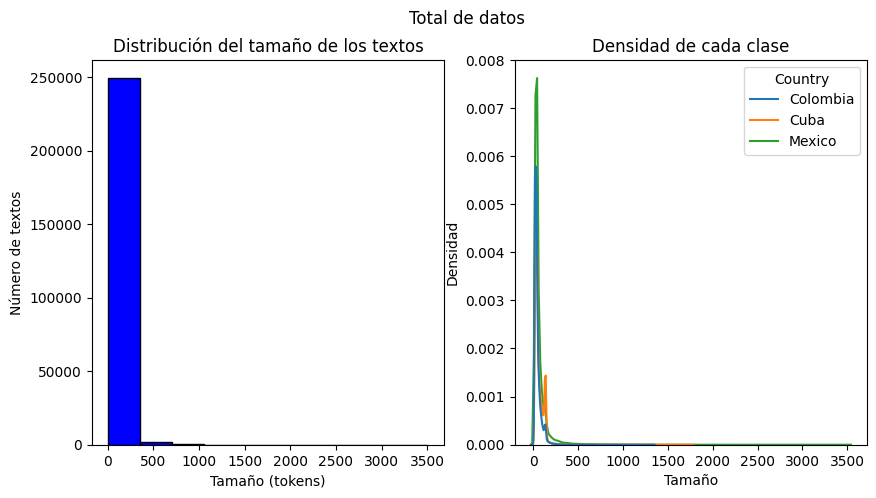

In [23]:
length_total=total_data['Review'].apply(lambda text: len(text.split()))
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Total de datos')

ax_train.hist(length_total,  color = 'blue', edgecolor = 'black',
         bins = int(100/10))
ax_train.set_title('Distribución del tamaño de los textos')
ax_train.set_xlabel('Tamaño (tokens)')
ax_train.set_ylabel('Número de textos')

total_data['length'] = total_data['Review'].apply(lambda text: len(text.split()))
sns.kdeplot(data=total_data, x='length', hue='Country', ax = ax_val)
ax_val.set_title('Densidad de cada clase')
ax_val.set_xlabel('Tamaño')
ax_val.set_ylabel('Densidad')